In [1]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

<IPython.core.display.Javascript object>


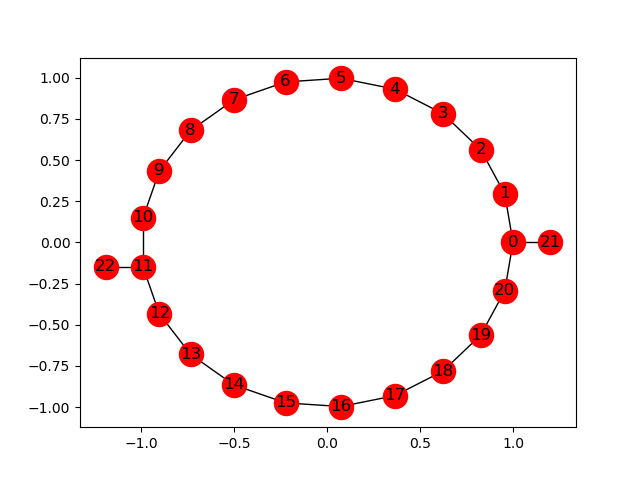

In [45]:
%matplotlib notebook

G = nx.newman_watts_strogatz_graph(21, 3, 0.)
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

#add one ouput channel
G.add_edge(len(G),0)
pos[len(G)-1] = pos[0]+[0.2,0]
G.add_edge(len(G),11)
pos[len(G)-1] = pos[11]+[-0.2,0]

chi = np.array([ 1.j for i in range(len(G.edges))])

plt.figure()
nx.draw_networkx(G,pos=pos)

In [77]:
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', transport_graph = True)
naq_u1.set_chi(9.1*naq_u1.chi0) #set the wavenumber

naq_u1.input_nodes = [len(G)-1] #which nodes are input nodes
naq_u1.input_values = [.1]  #fix the input flux on all the nodes
naq_u1.output_nodes = [len(G)-2]
naq_u1.update_laplacian()
L = naq_u1.L0.todense()



In [78]:
naq_u1.test_laplacian()

0.0008797424824607589

In [79]:
sol = naq_u1.compute_solution()


<IPython.core.display.Javascript object>


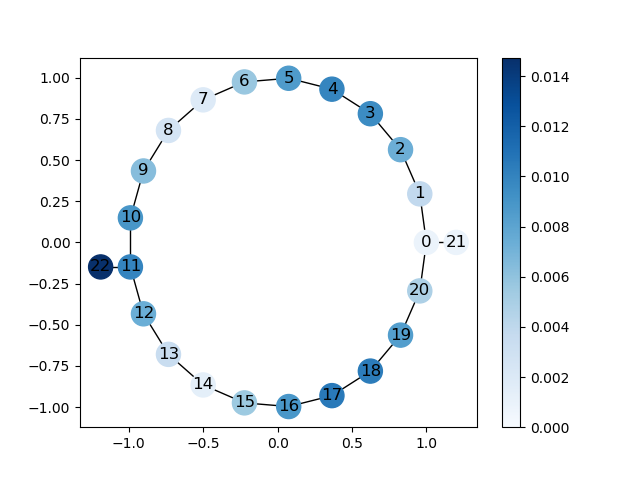

In [80]:
plt.figure()
sol_plot = abs(sol)
vmin=0#np.min(sol_plot)
vmax=np.max(sol_plot)
nx.draw_networkx(G, pos=pos, node_color = sol_plot,cmap='Blues',vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

<IPython.core.display.Javascript object>


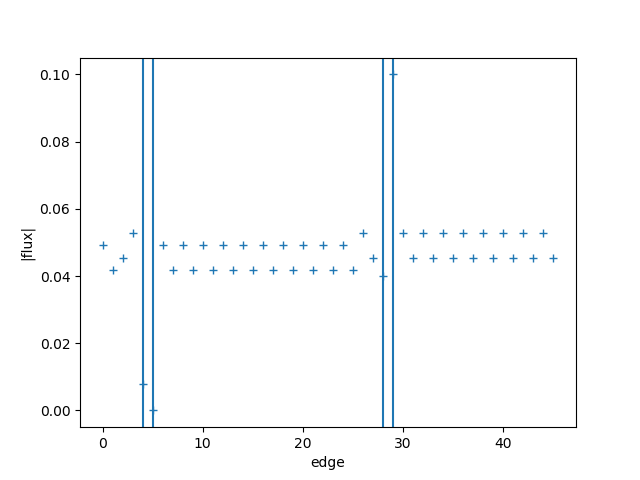

Text(0,0.5,'|flux|')

In [81]:
#compute the flux on each edge
B = naq_u1.BT.todense().T #full indicence matrix
Winv = naq_u1.Winv.todense()#weight matrix

flux = np.array(list(Winv.dot(B).dot(sol))).flatten() #flux on each edge

plt.figure()
plt.plot(np.abs(flux),'+')

#plot vertical lines for degree one edges
for ei, e in enumerate(list(naq_u1.graph.edges())):
            (u, v) = e[:2]
            if len(naq_u1.graph[v]) == 1:
                plt.axvline(2*ei)
                plt.axvline(2*ei+1)
plt.xlabel('edge')
plt.ylabel('|flux|')

In [83]:
#this finds modes which have no output fluxes
Ks = np.linspace(1., 9, 50)
k_mu = naq_u1.compute_spectrum_U1( Ks,3)


In [52]:
#scan the spectrum k
K = np.linspace(.5, 10., 1000)
s = np.zeros(len(K))

for i,k in enumerate(K):
    naq_u1.set_chi(k*chi)
    s[i] = naq_u1.test_laplacian()


<IPython.core.display.Javascript object>


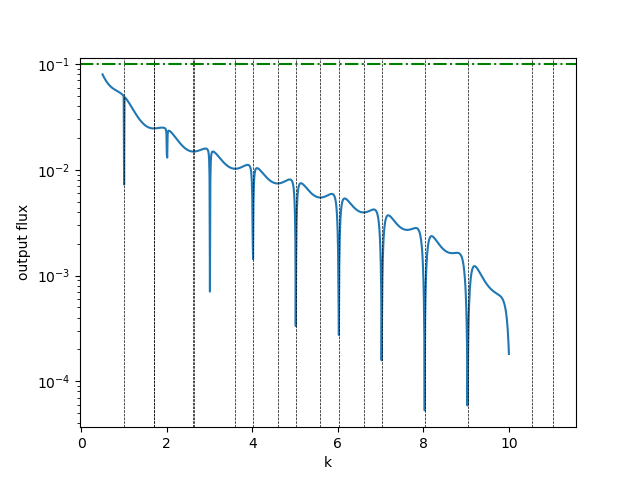

Text(0,0.5,'output flux')

In [53]:
#plot the spectrum
plt.figure()
plt.semilogy(K,np.abs(s))
for k in k_mu:
    plt.axvline(k,ls = '--',c='k' ,lw=0.5)
    
plt.axhline(np.sum(naq_u1.input_values),ls='-.',c='g')
plt.xlabel('k')
plt.ylabel('output flux')


output flux: 0.02459813716229102


<IPython.core.display.Javascript object>


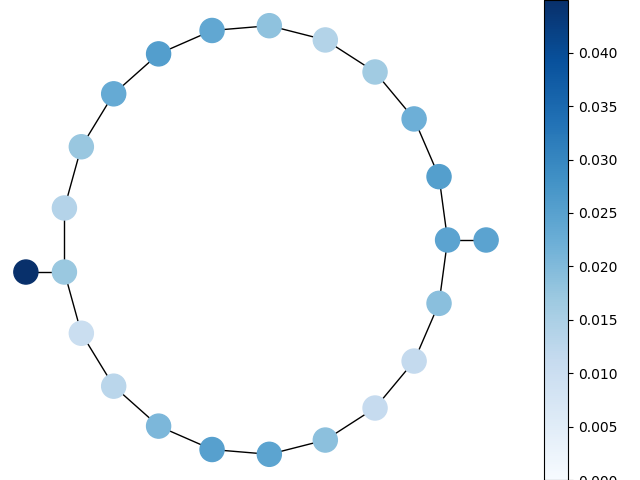

In [54]:
#plot the modes with no output on the graph
m = 1 #which mode to plot
naq_u1.set_chi(k_mu[m]*naq_u1.chi0) #set the wavenumber
naq_u1.update_laplacian()
sol = naq_u1.compute_solution()
print("output flux:", abs(sol[naq_u1.output_nodes]).sum())

plt.figure()
sol_plot = np.abs(sol)
vmin=0 #np.min(sol_plot)
vmax=np.max(sol_plot)
nx.draw(G, pos=pos, node_color = sol_plot,cmap='Blues',vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)